In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("test.csv")
train.head()

,Unnamed: 0,category,amt,city_pop,dob,is_fraud,time,month,weekday,Llat,Llong
0,0,misc_net,4.97,3495,37,0,0,1,1,0.067507,0.870215
1,1,grocery_pos,107.23,149,47,0,0,1,1,0.271247,0.024038
2,2,entertainment,220.11,4154,63,0,0,1,1,0.969904,0.107519
3,3,gas_transport,45.00,1939,58,0,0,1,1,0.803731,0.447271
4,4,misc_pos,41.96,99,39,0,0,1,1,0.254299,0.830441


In [3]:
# 过滤出 is_fraud=0 的行
filtered_df = train[train['is_fraud'] == 0]

# 按 category 分组，并计算 amt 的平均值
avg_amt_by_category = filtered_df.groupby('category')['amt'].mean()
avg_amt_by_category.head()

# 按 category 分组，并计算 amt 的中位数
median_amt_by_category = filtered_df.groupby('category')['amt'].median()
median_amt_by_category.head()

# 计算 amt 与中位数的差值
train['amt_diff'] = train['amt'] - train['category'].map(median_amt_by_category)
train.head()

,Unnamed: 0,category,amt,city_pop,dob,is_fraud,time,month,weekday,Llat,Llong,amt_diff
0,0,misc_net,4.97,3495,37,0,0,1,1,0.067507,0.870215,-4.71
1,1,grocery_pos,107.23,149,47,0,0,1,1,0.271247,0.024038,2.68
2,2,entertainment,220.11,4154,63,0,0,1,1,0.969904,0.107519,169.56
3,3,gas_transport,45.00,1939,58,0,0,1,1,0.803731,0.447271,-17.93
4,4,misc_pos,41.96,99,39,0,0,1,1,0.254299,0.830441,28.01


In [4]:
train.drop("Unnamed: 0", axis=1, inplace=True)
train = train[train['amt'] <= 2000]
train.head()

,category,amt,city_pop,dob,is_fraud,time,month,weekday,Llat,Llong,amt_diff
0,misc_net,4.97,3495,37,0,0,1,1,0.067507,0.870215,-4.71
1,grocery_pos,107.23,149,47,0,0,1,1,0.271247,0.024038,2.68
2,entertainment,220.11,4154,63,0,0,1,1,0.969904,0.107519,169.56
3,gas_transport,45.00,1939,58,0,0,1,1,0.803731,0.447271,-17.93
4,misc_pos,41.96,99,39,0,0,1,1,0.254299,0.830441,28.01


In [5]:
# from joblib import dump
# # 计算每个类别的目标均值
# target_encoding = train.groupby('category')['is_fraud'].mean()

# # 保存 target_encoding
# dump(target_encoding, '../finance-server/uploads/target_encoding.joblib')

# # 将目标均值映射到原始数据
# train['Encoding'] = train['category'].map(target_encoding)

import pandas as pd
# One-Hot 编码
train = pd.get_dummies(train, columns=['category'], drop_first=True)

# 动态获取 One-Hot 编码后的列名
one_hot_columns = [col for col in train.columns if col.startswith('category_')]

# 保存 One-Hot 编码后的列名
with open('../finance-server/uploads/one_hot_columns.txt', 'w') as f:
    for column in one_hot_columns:
        f.write(column + '\n')


train.head()

,amt,city_pop,dob,is_fraud,time,month,weekday,Llat,Llong,amt_diff,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,3495,37,0,0,1,1,0.067507,0.870215,-4.71,...,False,False,False,False,True,False,False,False,False,False
1,107.23,149,47,0,0,1,1,0.271247,0.024038,2.68,...,True,False,False,False,False,False,False,False,False,False
2,220.11,4154,63,0,0,1,1,0.969904,0.107519,169.56,...,False,False,False,False,False,False,False,False,False,False
3,45.00,1939,58,0,0,1,1,0.803731,0.447271,-17.93,...,False,False,False,False,False,False,False,False,False,False
4,41.96,99,39,0,0,1,1,0.254299,0.830441,28.01,...,False,False,False,False,False,True,False,False,False,False


In [6]:
# from sklearn.preprocessing import OneHotEncoder
# import joblib

# # 假设在训练时对 transType 列进行了 One-Hot 编码
# encoder = OneHotEncoder(drop='first', sparse_output=False)
# encoder.fit(train[['transType']])  # 在训练数据上拟合编码器

# # 保存编码器
# joblib.dump(encoder, 'onehot_encoder.joblib')

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # 提取 'amt' 列
# amt_column = train['amt']
# amt_filtered = amt_column[(amt_column >= 0) & (amt_column <= 2000)]
# # 绘制直方图

# plt.figure(figsize=(10, 6))  # 设置图形大小
# sns.histplot(amt_filtered , bins=10, kde=False, color='blue', stat='probability')  # 使用 seaborn 绘制直方图
# plt.title('Amount Distribution')  # 设置标题
# plt.xlabel('Amount Range')  # 设置 x 轴标签
# plt.ylabel('Probability')  # 设置 y 轴标签
# plt.xlim(0, 2000)  # 将 x 轴范围设置为 0 到 10000
# plt.grid(True)  # 添加网格
# plt.show()  # 显示图形

In [8]:
train['amt'].describe()


count    1.295944e+06
mean     6.812976e+01
std      1.070301e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.748000e+01
75%      8.305000e+01
max      1.999200e+03
Name: amt, dtype: float64

In [9]:
# sns.boxplot(x=train['Llat'])


In [10]:
# sns.boxplot(x=train['Llong'])


In [11]:
# sns.boxplot(x=train['city_pop'])

In [12]:
# selected_features = ['amt','city_pop','dob','time','weekday','Llat','Encoding']
selected_features = ['amt','city_pop','dob','time','weekday','Llat']+ one_hot_columns
# selected_features = ['amt_diff','city_pop','dob','time','weekday','Llat']
X = train[selected_features]  # 选择特定特征
y = train['is_fraud']  # 目标变量

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# from imblearn.combine import SMOTETomek

# smote_tomek = SMOTETomek(random_state=42)
# x_train_resampled,y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# # 加载保存的 CSV 文件
# resampled_data = pd.read_csv("resampled_data.csv")
# # 分离特征和目标
# x_train_resampled = resampled_data.drop(columns=["is_fraud"])
# y_train_resampled = resampled_data["is_fraud"]

d:\python\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [15]:
import xgboost as xgb

# scale_pos_weight = sum(y_train_resampled == 0) /sum(y_train_resampled == 1)
scale_pos_weight = len(y_train_resampled) / sum(y_train_resampled == 0)
# 初始化 XGBoost 模型
model = xgb.XGBClassifier(
    objective='binary:logistic',  # 二分类任务
    scale_pos_weight=scale_pos_weight,  # 调整权重
    eval_metric='auc',  # 使用 AUC 作为评估指标
    random_state=42,
    n_estimators=1000,  # 最大树数
    learning_rate=0.01,  # 学习率
    max_depth=6,  # 树的最大深度
    early_stopping_rounds=10,  # 早停法

)

# 训练模型
model.fit(x_train_resampled, y_train_resampled, eval_set=[(X_test, y_test)], verbose=True)

# 预测
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # 预测概率（用于 AUC 和 ROC）



[0]	validation_0-auc:0.97758
[1]	validation_0-auc:0.97767
[2]	validation_0-auc:0.98108
[3]	validation_0-auc:0.98277
[4]	validation_0-auc:0.98270
[5]	validation_0-auc:0.98269
[6]	validation_0-auc:0.98280
[7]	validation_0-auc:0.98278
[8]	validation_0-auc:0.98271
[9]	validation_0-auc:0.98278
[10]	validation_0-auc:0.98279
[11]	validation_0-auc:0.98274
[12]	validation_0-auc:0.98279
[13]	validation_0-auc:0.98330
[14]	validation_0-auc:0.98324
[15]	validation_0-auc:0.98337
[16]	validation_0-auc:0.98344
[17]	validation_0-auc:0.98400
[18]	validation_0-auc:0.98433
[19]	validation_0-auc:0.98456
[20]	validation_0-auc:0.98492
[21]	validation_0-auc:0.98506
[22]	validation_0-auc:0.98521
[23]	validation_0-auc:0.98525
[24]	validation_0-auc:0.98584
[25]	validation_0-auc:0.98618
[26]	validation_0-auc:0.98618
[27]	validation_0-auc:0.98637
[28]	validation_0-auc:0.98638
[29]	validation_0-auc:0.98643
[30]	validation_0-auc:0.98658
[31]	validation_0-auc:0.98663
[32]	validation_0-auc:0.98663
[33]	validation_0-au

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


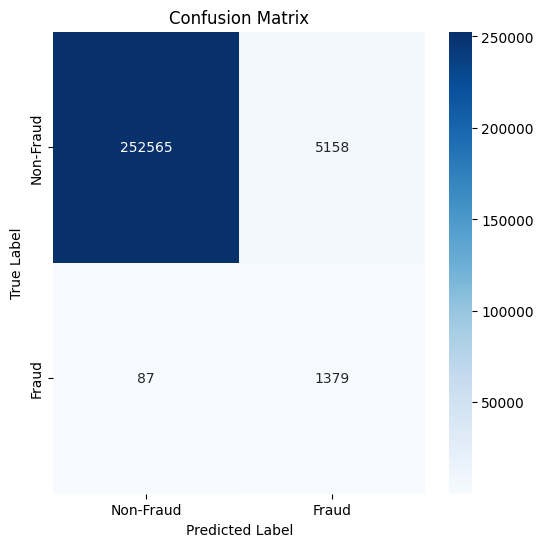

In [17]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


AUC Score: 0.9950


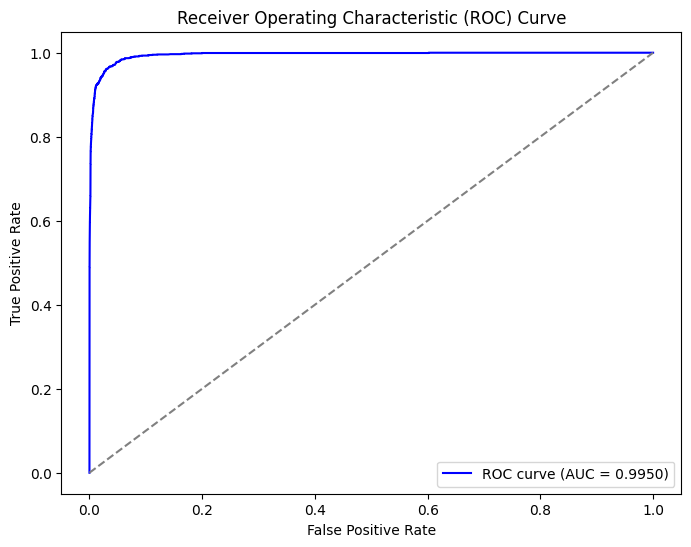

In [18]:
# 计算 AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")

# 计算 ROC 曲线的 FPR 和 TPR
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
# plt.savefig("../finance-web/public/XGBoostROC.png")  # 保存为文件
plt.show()


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.2110
Recall: 0.9407
F1-Score: 0.3446


In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9798


In [21]:

    # 计算评估指标
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))
    print(f"AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# 假设 y_test 是真实标签，y_pred 是预测标签，y_prob 是预测概率
auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 创建 DataFrame
results = pd.DataFrame({
    'AUC': [f"{auc:.4f}"],  # 格式化 AUC
    'Precision': [f"{precision:.4f}"],  # 格式化 Precision
    'Recall': [f"{recall:.4f}"],  # 格式化 Recall
    'F1Score': [f"{f1:.4f}"]  # 格式化 F1Score
})
    results.to_csv("../finance-server/uploads/XGBoost.csv", index=False)  # 保存为 CSV 文件

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99    257723
       Fraud       0.21      0.94      0.34      1466

    accuracy                           0.98    259189
   macro avg       0.61      0.96      0.67    259189
weighted avg       1.00      0.98      0.99    259189

AUC Score: 0.9950
Precision: 0.2110
Recall: 0.9407
F1-Score: 0.3446


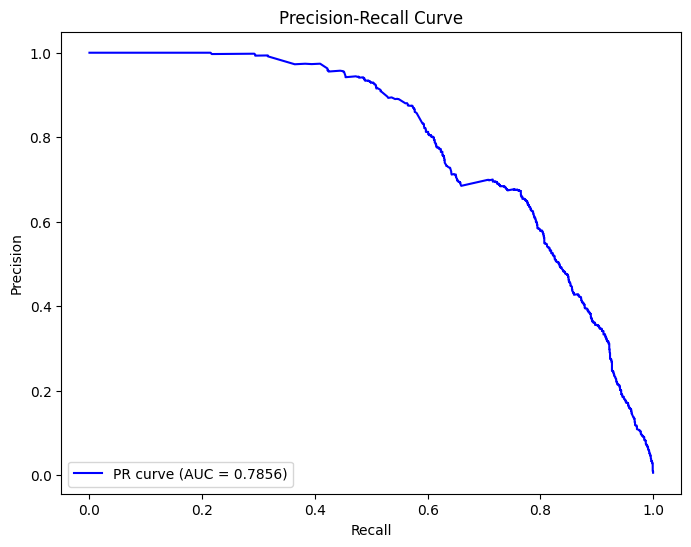

In [22]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'PR curve (AUC = {pr_auc:.4f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

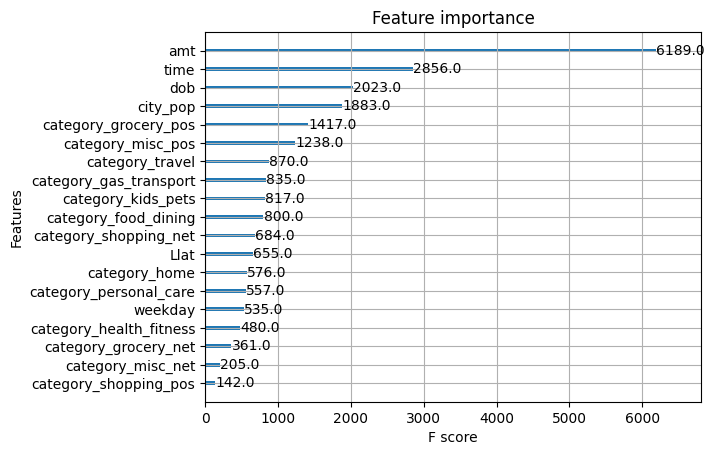

In [23]:
xgb.plot_importance(model)

In [24]:
random_sample = train.sample(n=5, random_state=42)  # random_state 确保结果可复现
random_features = ['amt','city_pop','dob','time','weekday','Llat'] +  one_hot_columns
# random_features = ['amt_diff','city_pop','dob','time','weekday','Llat'] +  one_hot_columns

X1 = random_sample[random_features]  # 选择特定特征
predictions =model.predict(X1)
predictions2 = model.predict_proba(X1)[:, 1]
# 输出预测结果
print("Predictions:", predictions)
print("predictions2:", predictions2)
print("is_fraud:", random_sample['is_fraud'])

Predictions: [0 0 0 0 0]
predictions2: [0.03487661 0.04247125 0.0350083  0.04996343 0.05891431]
is_fraud: 938543     0
1006670    0
383656     0
1113345    0
777638     0
Name: is_fraud, dtype: int64


In [25]:
newTest = pd.read_csv("Newtest.csv")
newX = newTest[random_features]
newY = newTest['is_fraud']
new_pred = model.predict(newX)
new_prob = model.predict_proba(newX)[:, 1]  # 预测概率（用于 AUC 和 ROC）

# 假设 y_test 是真实标签，y_pred 是预测标签，y_prob 是预测概率
print(f"AUC Score: {roc_auc_score(newY, new_prob):.4f}")
print(f"Precision: {precision_score(newY, new_pred):.4f}")
print(f"Recall: {recall_score(newY, new_pred):.4f}")
print(f"F1-Score: {f1_score(newY, new_pred):.4f}")

AUC Score: 0.9935
Precision: 0.1495
Recall: 0.9291
F1-Score: 0.2575


In [26]:
from joblib import dump

# 假设 best_model 是训练好的模型
dump(model, '../finance-server/uploads/XGBoostModel.joblib')

['../finance-server/uploads/XGBoostModel.joblib']